In [1]:
# https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html#sphx-glr-auto-examples-hyperparameter-optimization-py

In [2]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np

In [3]:
space  = [
    Integer(0, 5, name="alpha"),
    Integer(-2, 10, name="beta"),
    Integer(0, 8, name="gamma"),
    
    Real(10**-5, 10**0, "log-uniform", name="lr"),
    Real(0, 1, name="epsilon"),
    Real(0, 1, name="lmbda"),
]

In [4]:
@use_named_args(space)
def objective(**params):
    """  The objective we want to MINIMIZE """
    
    # for a neural net
    # model.set_params(**params)
    # return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error"))
    
    print(params)
    result = 0
    for x in params.values():
        result -= x
    return result

In [5]:
from skopt import gp_minimize
gp_result = gp_minimize(
    objective, 
    space, 
    n_calls=15, 
    random_state=0)

print("Best score:", gp_result.fun)

{'alpha': 3, 'beta': 8, 'gamma': 7, 'lr': 0.17228945369609433, 'epsilon': 0.6235636967859725, 'lmbda': 0.38438170729269994}
{'alpha': 1, 'beta': -1, 'gamma': 2, 'lr': 0.0024452630570839917, 'epsilon': 0.8121687287754934, 'lmbda': 0.47997717237505744}
{'alpha': 2, 'beta': 8, 'gamma': 3, 'lr': 0.017412429067220004, 'epsilon': 0.368241539840548, 'lmbda': 0.9571551589530466}
{'alpha': 1, 'beta': 8, 'gamma': 4, 'lr': 0.10105405843110161, 'epsilon': 0.5204774795512049, 'lmbda': 0.6788795301189604}
{'alpha': 4, 'beta': 5, 'gamma': 4, 'lr': 0.06209807272272614, 'epsilon': 0.10590760718779216, 'lmbda': 0.47360041934665753}
{'alpha': 1, 'beta': 7, 'gamma': 2, 'lr': 4.743412208473003e-05, 'epsilon': 0.32414100779321414, 'lmbda': 0.1496748671836832}
{'alpha': 1, 'beta': 3, 'gamma': 7, 'lr': 0.001777255838269662, 'epsilon': 0.6130634578841325, 'lmbda': 0.9023485831739845}
{'alpha': 0, 'beta': 10, 'gamma': 5, 'lr': 7.153983360412324e-05, 'epsilon': 0.35815216696952507, 'lmbda': 0.7506861412184564}
{

/home/till/.local/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

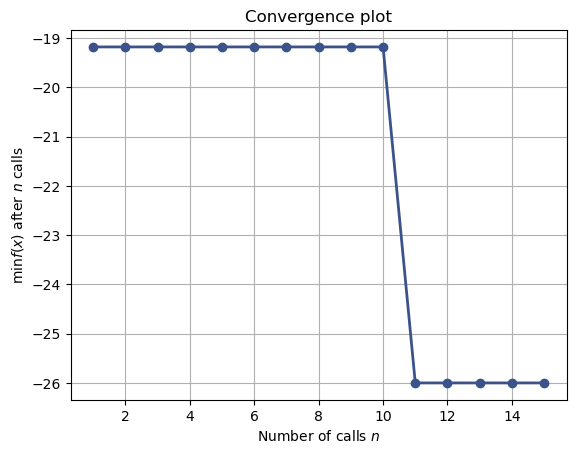

In [7]:
from skopt.plots import plot_convergence

plot_convergence(gp_result)

In [ ]:
# # Example from the docs
# # https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html#sphx-glr-auto-examples-hyperparameter-optimization-py
# 
# from sklearn.datasets import load_boston
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import cross_val_score
# 
# boston = load_boston()
# X, y = boston.data, boston.target
# n_features = X.shape[1]
# 
# # gradient boosted trees tend to do well on problems like this
# reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
# 
# 
# 
# 
# from skopt.space import Real, Integer
# from skopt.utils import use_named_args
# 
# # hint: Integer ranges are inclusive here.
# 
# # The list of hyper-parameters we want to optimize. For each one we define the
# # bounds, the corresponding scikit-learn parameter name, as well as how to
# # sample values from that dimension (`'log-uniform'` for the learning rate)
# 
# space  = [
#     Integer(1, 5, name='max_depth'),
#     Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
#     Integer(1, 5, name='max_features'),
#     Integer(2, 100, name='min_samples_split'),
#     Integer(1, 100, name='min_samples_leaf')
# ]
# 
# # this decorator allows your objective function to receive a the parameters as
# # keyword arguments. This is particularly convenient when you want to set
# # scikit-learn estimator parameters
# @use_named_args(space)
# def objective(**params):
#     reg.set_params(**params)
# 
#     return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
#                                     scoring="neg_mean_absolute_error"))